In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


In [5]:
X_df = pd.read_csv('./videos_relabelled.csv', index_col=None)
# target_emotion = 'contempt'
# target_culture = ''
# X_df = X_df[(X_df['emotion'] == target_emotion) & (X_df['culture'] == target_culture)]
# print(X_df.head())
# filenames = X['filename'].unique()
# face_ids = X['face_id'].unique()
grouped = X_df.groupby(by=['filename', 'face_id'])
# X_list is video/face frames, divided into 50 frames chunks
X_list = []
Y_list = []

for key in grouped.groups:
    X_group = grouped.get_group(key)
    if (len(X_group) >= frame_limit):
        for i in range(0, len(X_group)/25):
            splitted_group = X_group[i * 25, math.min(len(X_group), i * 25 + 50)]
            X_list.append(splitted_group.drop(columns=['frame', 'face_id', 'culture', 'filename', 'emotion', 'confidence','success', 'gender', 'talking'], axis=1).values)
            Y_list.append(X_group['emotion'].iloc[0])
    else:
        X_list.append(splitted_group.drop(columns=['frame', 'face_id', 'culture', 'filename', 'emotion', 'confidence','success', 'gender', 'talking'], axis=1).values)
        Y_list.append(X_group['emotion'].iloc[0])   
    # print(type(X_group))
print(len(X_list))
print(len(Y_list))
print(X_list[0])

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 20)

In [10]:
video_newlabel = [('27', 'remove'), ('7', 'anger'), ('10', 'remove'), ('44', 'contempt'), ('45', 'anger'), ('47', 'anger'), ('64', 'contempt'), ('70', 'anger'), ('other_17', 'remove')]

df = pd.read_csv('./all_videos.csv')

In [2]:
# for item in video_newlabel:
#     if item[1] != 'remove':
#         df.loc[df.filename == item[0], 'emotion'] = item[1]
#     else:
#         df.drop(df[df.filename==item[0]].index, inplace=True)

# df.loc[(df.filename == item[0]) & (df.face_id == 1), 'emotion'] = 'disgust'
df = pd.read_csv('./videos_relabelled.csv')
df.loc[(df.filename == 'anger_48'), 'emotion'] = 'anger'
df.to_csv('videos_relabelled.csv', index=None)

# Contempt - Philipines most important features
Since AU07 has the biggest value in two components, I summed them in one (0.27 of total variance) and contributed 0.5 of component #2 to AU_06, which is the second biggest value

In [64]:
df = pd.read_csv('./videos_relabelled.csv')
df = df[(df.emotion == 'disgust') & (df.culture == 'Persian')]
au_values_df = df.drop(columns = ['success','confidence', 'face_id','frame', 'culture','filename', 'emotion', 'gender', 'talking']) 
le = LabelEncoder()
# mean normalization - Pandas automatically applies colomn-wise function in the code above.
# normalized_df=(au_values_df-au_values_df.mean())/au_values_df.std()
normalized_df=(au_values_df-au_values_df.min())/(au_values_df.max()-au_values_df.min()) 

In [65]:
pca = PCA(n_components=4)
pca_anger = pca.fit_transform(normalized_df.values)
# pca_anger.components_
feature_names = au_values_df.columns
print(feature_names)

Index(['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r',
       'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU23_r', 'AU25_r',
       'AU26_r', 'AU45_r'],
      dtype='object')


In [66]:
np.set_printoptions(precision=3, suppress=True)
print(pca.components_)

[[ 0.084  0.103  0.395  0.272  0.389 -0.086  0.105  0.414  0.44   0.176
   0.216  0.341 -0.008  0.066 -0.132  0.043]
 [-0.162 -0.18  -0.155 -0.432  0.106  0.366  0.356  0.154 -0.236  0.064
   0.416  0.26   0.041 -0.214 -0.124  0.268]
 [-0.249 -0.181 -0.076 -0.075  0.346  0.341  0.229  0.14   0.154  0.203
  -0.237 -0.453 -0.065  0.468  0.177 -0.063]
 [ 0.705  0.468 -0.094 -0.005  0.042  0.339  0.129 -0.099 -0.006  0.11
  -0.014 -0.193  0.075  0.061 -0.073  0.262]]


In [61]:
pca.explained_variance_ratio_

array([0.254, 0.143, 0.116, 0.111])

In [62]:
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
feat_df = pd.DataFrame(dic.items())

In [63]:
feat_df

0       1
0  PC0  AU04_r
1  PC1  AU15_r
2  PC2  AU01_r
3  PC3  AU26_r

# Disgust most important features

In [10]:
df = pd.read_csv('./videos_relabelled.csv')
df = df[df.emotion == 'disgust']
au_values_df = df.drop(columns = ['success','confidence', 'face_id','frame', 'culture','filename', 'emotion', 'gender', 'talking']) 
le = LabelEncoder()
# mean normalization - Pandas automatically applies colomn-wise function in the code above.
# normalized_df=(au_values_df-au_values_df.mean())/au_values_df.std()
normalized_df=(au_values_df-au_values_df.min())/(au_values_df.max()-au_values_df.min()) 
pca = PCA(n_components=4)
pca_anger = pca.fit_transform(normalized_df.values)
# pca_anger.components_
feature_names = au_values_df.columns
print(feature_names)
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
feat_df = pd.DataFrame(dic.items())

Index(['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r',
       'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU23_r', 'AU25_r',
       'AU26_r', 'AU45_r'],
      dtype='object')


In [11]:
feat_df

0       1
0  PC0  AU07_r
1  PC1  AU04_r
2  PC2  AU25_r
3  PC3  AU12_r

In [12]:
pca.explained_variance_ratio_

array([0.2221659 , 0.21254442, 0.10973932, 0.08139121])

Text(0, 0.5, 'cumulative explained variance')

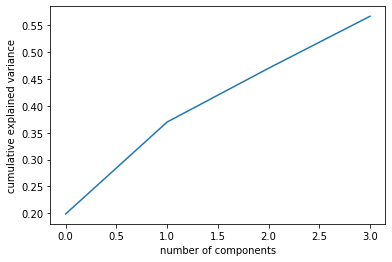

In [37]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# Contempt

In [7]:
df = pd.read_csv('./videos_relabelled.csv')
df = df[df.emotion == 'contempt']
au_values_df = df.drop(columns = ['success','confidence', 'face_id','frame', 'culture','filename', 'emotion', 'gender', 'talking']) 
le = LabelEncoder()
# mean normalization - Pandas automatically applies colomn-wise function in the code above.
# normalized_df=(au_values_df-au_values_df.mean())/au_values_df.std()
normalized_df=(au_values_df-au_values_df.min())/(au_values_df.max()-au_values_df.min()) 
pca = PCA(n_components=4)
pca_anger = pca.fit_transform(normalized_df.values)
# pca_anger.components_
feature_names = au_values_df.columns
print(feature_names)
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
feat_df = pd.DataFrame(dic.items())

Index(['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r',
       'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU23_r', 'AU25_r',
       'AU26_r', 'AU45_r'],
      dtype='object')


In [8]:
feat_df

0       1
0  PC0  AU02_r
1  PC1  AU12_r
2  PC2  AU17_r
3  PC3  AU45_r

In [9]:
pca.explained_variance_ratio_

array([0.21996778, 0.1578937 , 0.11961217, 0.08955488])

anger
          cmp1      cmp2      cmp3  label
5439 -0.173405 -0.210733 -0.177349  anger
5440 -0.186176 -0.211021 -0.208391  anger
5441 -0.193114 -0.199948 -0.178701  anger
5442 -0.218395 -0.222411 -0.179331  anger
5443 -0.209395 -0.235439 -0.182271  anger
anger 
           cmp1      cmp2      cmp3   label
23721 -0.113778 -0.134122 -0.192205  anger 
23722 -0.113458 -0.173503 -0.239101  anger 
23723 -0.109893 -0.136781 -0.224873  anger 
23724 -0.121180 -0.126108 -0.225007  anger 
23725 -0.098120 -0.153756 -0.235159  anger 
contempt
       cmp1      cmp2      cmp3     label
0 -0.221728  0.240112 -0.112229  contempt
1 -0.215497  0.259023 -0.134231  contempt
2 -0.205018  0.260734 -0.134578  contempt
3 -0.207709  0.254597 -0.135651  contempt
4 -0.180172  0.260636 -0.145374  contempt
disgust
          cmp1      cmp2      cmp3    label
3376  0.835328  0.366487 -0.186016  disgust
3377  0.450224  0.359045 -0.089412  disgust
3378  0.827974  0.363511 -0.210954  disgust
3379  0.435914  0.336697 -

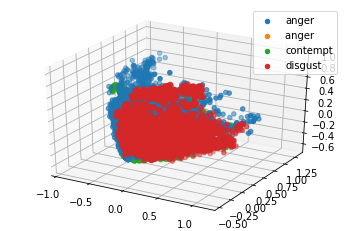

In [23]:
from mpl_toolkits.mplot3d import Axes3D  
pca_df = pd.DataFrame(pca_cmp, columns=['cmp1', 'cmp2', 'cmp3'])
pca_df['label'] = df['emotion']
le.fit_transform(pca_df['label'])
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# for (i, label) in enumerate(le.classes_):
#     print(label)
#     target_df = pca_df[pca_df['label'] == label]
#     print(target_df.head())
#     ax.scatter(xs=target_df['cmp1'].values, ys=target_df['cmp2'].values, zs=target_df['cmp3'].values, label=label)

# plt.legend()
# plt.show()

In [17]:
pca_df.head()

cmp1      cmp2  label
0 -2.237450 -0.575953  anger
1 -2.250441 -0.531156  anger
2 -2.248928 -0.390175  anger
3 -2.391676 -0.292997  anger
4 -2.282767 -0.461399  anger

In [25]:
df = pd.read_csv('./videos_relabelled.csv')
df[(df['emotion'] == 'contempt') & (df['culture'] == 'Philippines')].groupby('filename').nunique()

frame  face_id  confidence  success  AU01_r  AU02_r  AU04_r  \
filename                                                                     
contempt_0_p      51        1           3        1      45      24      41   
contempt_10_p     58        1           3        1      33       6      29   
contempt_12_p    105        1           1        1      82      90      56   
contempt_13_p     20        1           4        1       5      18       2   
contempt_15_p     82        1           3        1      64      74      47   
contempt_16_p    122        1           4        1      87      61      38   
contempt_18_p    104        1           2        1      71      84      52   
contempt_19_p     93        1           3        1      60       6      57   
contempt_1_p      17        1           2        1       9       1      15   
contempt_20_p    207        1           3        1     120     105      77   
contempt_21_p     84        1           2        1      66      64      21   
contempt_22_p     90        1           3        1      67      35      65   
contempt_23_p     62        1           2        1      47      29      41   
contempt_24_p     35        1           3        1      32      31      13   
contempt_25_p    144        1           1        1      66      48       5   
contempt_26_p     56        1           2        1       8      11      19   
contempt_27_p     16        1           3        1       8       3      15   
contempt_28_p     84        1           1        1      51      49      14   
contempt_29_p     32        1           1        1      27      28      25   
contempt_4_p     111        1           2        1      86      78      36   
contempt_7_p     161        1           3        1     102     105      94   
contempt_8_p      70        1           1        1      48      51      52   

               AU05_r  AU06_r  AU07_r  ...  AU17_r  AU23_r  AU25_r  AU26_r  \
filename                               ...                                   
contempt_0_p       26       1       7  ...       2       2      42      38   
contempt_10_p      48      45      44  ...      21       1      50      19   
contempt_12_p       7       1      31  ...      13       1      73      75   
contempt_13_p      11       4      17  ...       9       1       9      19   
contempt_15_p      65       3       2  ...      69      13      55      47   
contempt_16_p      51      34      55  ...      17       5      75      89   
contempt_18_p      40       1      40  ...      47      10      82      87   
contempt_19_p      64       5      15  ...      12      13      59      55   
contempt_1_p        1      12       6  ...       9       1       1       1   
contempt_20_p      56      21      40  ...      27       7     131     113   
contempt_21_p      36      23      28  ...       1      15      70      66   
contempt_22_p      66      42      23  ...      45      16      64      27   
contempt_23_p      49      14       2  ...       5       1      51      25   
contempt_24_p      30       2      17  ...      31      18      12       1   
contempt_25_p       4      17      83  ...       1       1      49      24   
contempt_26_p      41      14       5  ...       1       1       5       1   
contempt_27_p       5       4       7  ...       2       2       3       5   
contempt_28_p       5       2      57  ...       1       1      57      21   
contempt_29_p      28      26      27  ...      30       1      30      31   
contempt_4_p       67      73      20  ...      64       9      89      67   
contempt_7_p      108      76      57  ...       8       1     102      51   
contempt_8_p       54      10      20  ...       1       1      60      15   

               AU45_r  filename  culture  emotion  talking  gender  
filename                                                            
contempt_0_p        7         1        1        1        1       1  
contempt_10_p      47         1        1        1        1    

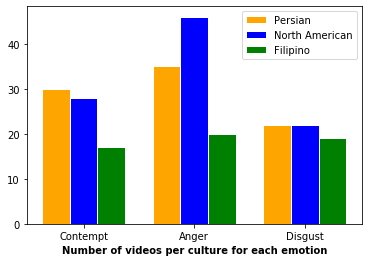

In [33]:
# Emotions (p, na, f)
C = [30, 35, 22]
A = [28, 46, 22]
D = [17, 20, 19]

barWidth = 0.25
r1 = np.arange(len(C))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, C, color='orange', width=barWidth, edgecolor='white', label='Persian')
plt.bar(r2, A, color='blue', width=barWidth, edgecolor='white', label='North American')
plt.bar(r3, D, color='green', width=barWidth, edgecolor='white', label='Filipino')
 
# Add xticks on the middle of the group bars
plt.xlabel('Number of videos per culture for each emotion', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(C))], ['Contempt', 'Anger', 'Disgust'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

